In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# enforce white grid background
sns.set_style("whitegrid")      # or “white” if you don’t want the grid

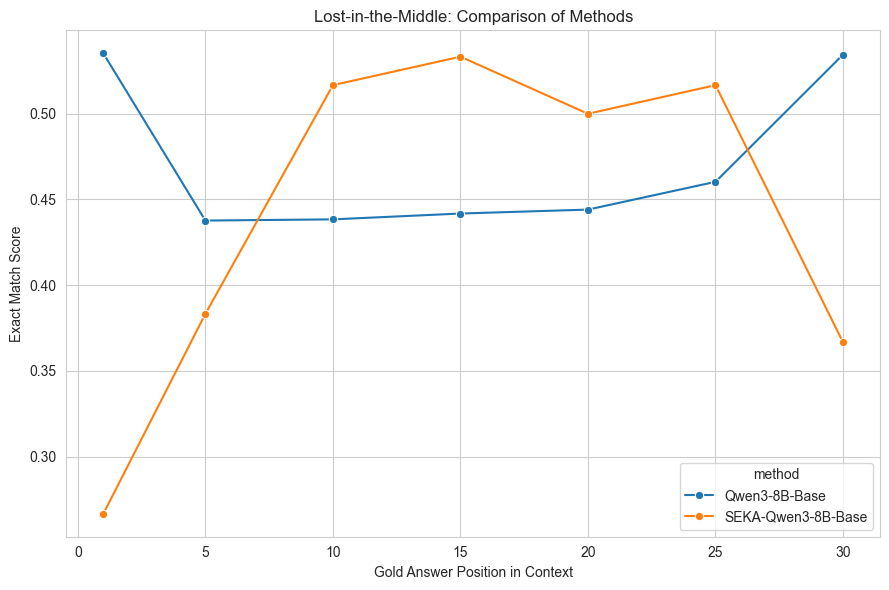

In [28]:
# Load the base method
result_dir = "../benchmarks/lost_in_the_middle/results"
df1 = pd.read_csv(f"{result_dir}/qwen3-8b-base/lost_middle_Qwen3-8B-Base.csv").sort_values(by="gold_position")
# df2 = pd.read_csv(f"{result_dir}/qwen3-8b-base-prefix/lost_middle_Qwen3-1.7B-Base.csv").sort_values(by="gold_position")
df3 = pd.read_csv(f"{result_dir}/seka-qwen3-8b-base/lost_middle_Qwen3-8B-Base.csv").sort_values(by="gold_position")

df1["gold_position"] = df1["gold_position"].astype(int) + 1
# df2["gold_position"] = df2["gold_position"].astype(int) + 1
df3["gold_position"] = df3["gold_position"].astype(int) + 1
# Add method labels
df1["method"] = "Qwen3-8B-Base"
# df2["method"] = "Qwen3-1.7B-Base-Prefix"
df3["method"] = "SEKA-Qwen3-8B-Base"

# Combine all into one DataFrame
df_all = pd.concat([df1, df3], ignore_index=True)

# Plot
plt.figure(figsize=(9, 6))
sns.lineplot(data=df_all, x="gold_position", y="exact_match", hue="method", marker="o")
plt.title("Lost-in-the-Middle: Comparison of Methods")
plt.xlabel("Gold Answer Position in Context")
plt.ylabel("Exact Match Score")
plt.grid(True)
plt.tight_layout()
plt.show()